# Life cycle of machine learning project
###  data analysis
- Understand the project statement
- Data Collection
- Data check to perform 
- Exploraroty data analysis

### model development
- Understand the project statement
- Data Collection
- Data Cleaning
- feature engineering
- Data preprocessing
- Model training
- Choose the best model
### model deployment
- structure the code in modular programming
- configure the docker image to make the code deployable
- deploy the model in aws

### librerias necesarias

In [51]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

### 1.0 problem statement

Company X specializes in buying second-hand cars. To determine which car to purchase, an employee of the company must examine the car’s features, such as the number of passengers it can carry, the number of doors it has, among others. Based on various characteristics, the employee determines whether it is acceptable to buy the car by assigning one of the following options: evaluation level (unacceptable, acceptable, good, very good). The company wants to make this process more automated, and you have been given access to the database, so your task is to create a program that, based on the car's characteristics, 
automatically determines if it is acceptable to buy or not
<br>
url: https://www.kaggle.com/datasets/stealthtechnologies/car-evaluation-classification

### 2.0 Data collection

#### 2.1 Data extracion from database

In [5]:
driver = "ODBC+Driver+17+for+SQL+Server"
server_name = "localhost"
database = "BDdatasets"
UID = "sa"
PWD = "0440"

connection_string = f"mssql+pyodbc://{UID}:{PWD}@{server_name}/{database}?driver={driver}"

engine = create_engine(connection_string)

query  = "Select * FROM CarsBuyClassification"

df = pd.read_sql_query( query,engine )

### 2.2 show top 5 records

In [6]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


#### 2.3 shape of dataset

In [8]:
df.shape

(1728, 7)

### 2.5 dataset information 

- buying	: buying price	
- maint : price of the maintenance		
- doors: 	number of doors		
- persons	:	capacity in terms of persons to carry		
- lug_boot:	the size of luggage boot		
- safety:	estimated safety of the car		

- evaluation level (unacceptable, acceptable, good, very good)	<- target	

3.0 data check

- check missing values
- drop nulls if is necesary
- check duplicates
- drop ids
- check data types
- check the number of unique values for each column
- check statistics in the dataset
- check what columns are numerical and which are categorical
- check the diferents categories present in each categorical columns

### 3.1 check missing values

In [11]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

##### insights
- there is not null values

### 3.2 drop nulls if is necesary

In [ ]:
### is not necesary

### 3.3 check duplicates

In [14]:
df.duplicated().sum()

np.int64(0)

##### insights
- there is not duplicated values

### 3.4 drops id column is necesary

In [ ]:
### there is not id column

### 3.5 check data types

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


##### insight
- all column are categorical 

### 3.6 check the number of unique value of each column

In [17]:
df.nunique()

buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
class       4
dtype: int64

### 3.7 check statistics in the dataset

In [ ]:
### is no posible because the column are categorical

### 3.8 check what columns are numerical and which are categorical

In [ ]:
### all the column are categorical

### 3.9 check the diferents categories in each categorical column

In [20]:
columns = df.columns
print(f"there are {len(columns)} categorical column" )
print(columns)

there are 7 categorical column
Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')


In [22]:
for column in columns:
    print(f"column {column} ")
    print(f"{df[column].unique()}")

column buying 
['vhigh' 'high' 'med' 'low']
column maint 
['vhigh' 'high' 'med' 'low']
column doors 
['2' '3' '4' '5more']
column persons 
['2' '4' 'more']
column lug_boot 
['small' 'med' 'big']
column safety 
['low' 'med' 'high']
column class 
['unacc' 'acc' 'vgood' 'good']


##### insight:
- all the columns can be interpreted as ordinal
- in the modeling is complety obligatory set the categorial in a manual way

### 4.0 Exploratory data analysis

visualizing the data using :
- pie char
- bar char

In [57]:
palete = plt.cm.Set2.colors

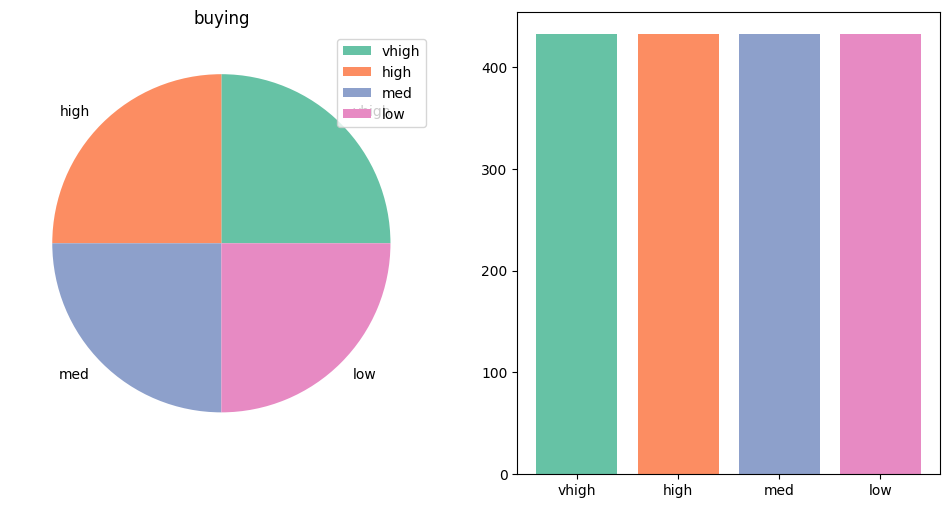

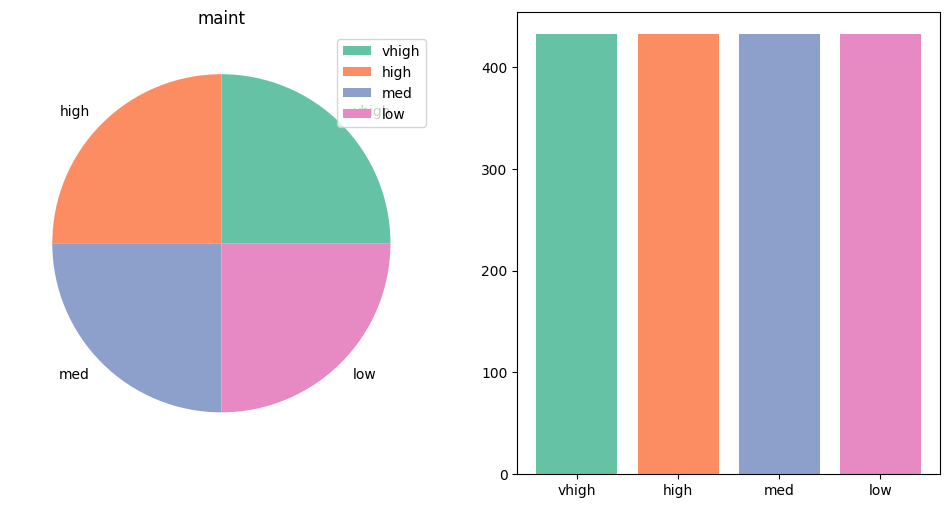

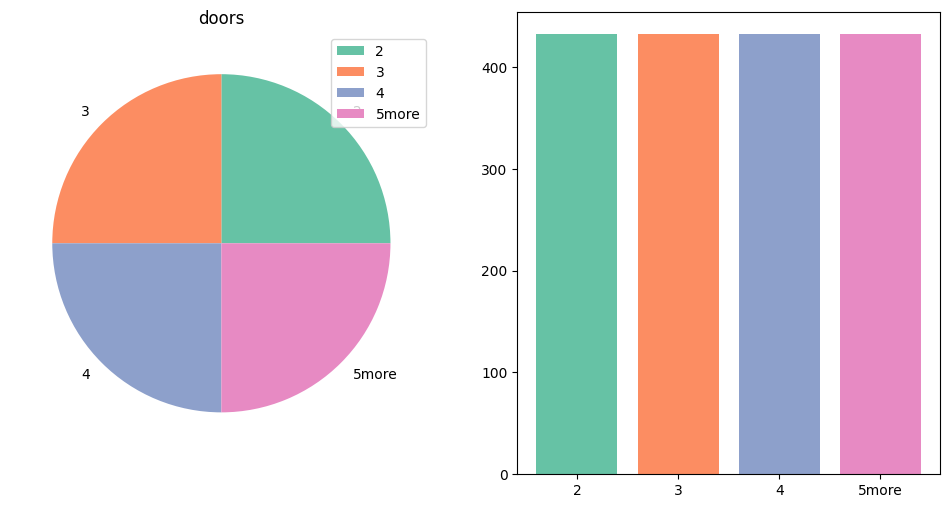

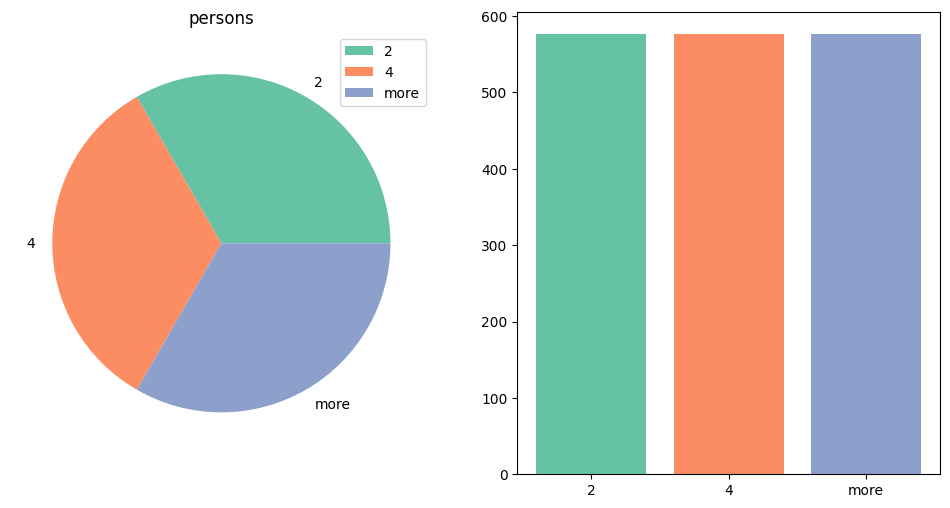

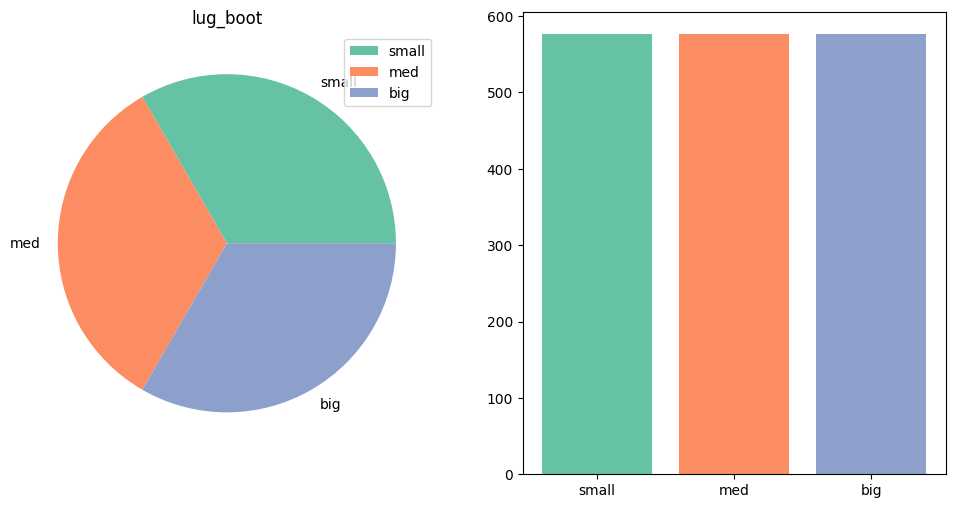

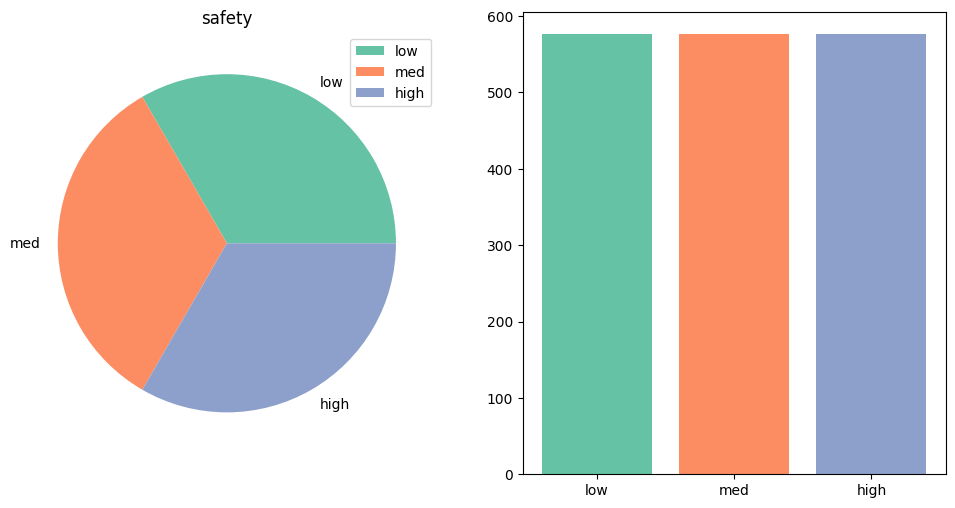

In [71]:
columns = df.drop(columns = ["class"]).columns
for column in columns :
    
    fig , axes = plt.subplots(1,2,figsize = (12 , 6))
    
    values = df[column].value_counts()
    categories = df[column].value_counts().index
    colors = palete[:len(categories)]
    
    axes[0].pie(values , labels = categories,  colors = colors)
    axes[0].set_title(column)
    axes[0].legend(categories , loc ="upper right")
    axes[1].bar( categories , values , color = colors)
    
    plt.show()

##### insights
- every option for every feature is perfectly distributed, that mean that the dataset is sintetyc

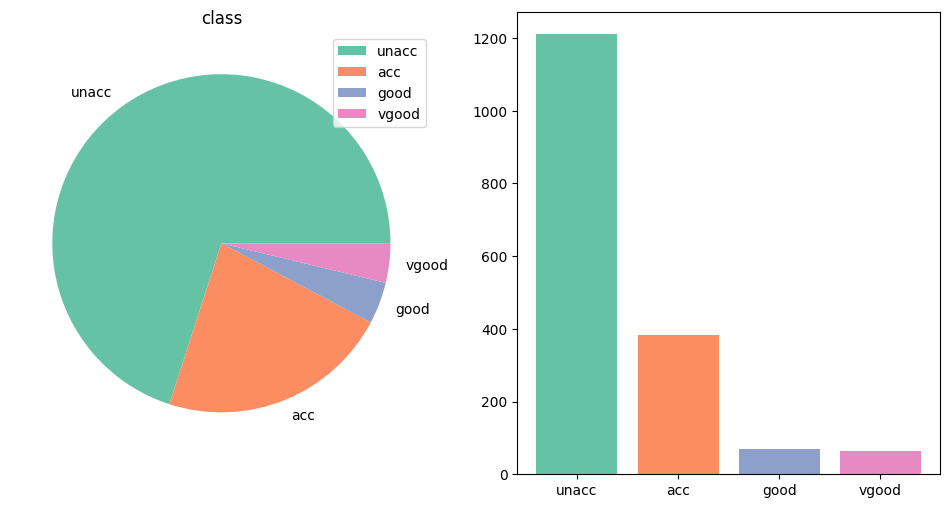

In [72]:
columns = df[["class"]].columns
for column in columns :
    
    fig , axes = plt.subplots(1,2,figsize = (12 , 6))
    
    values = df[column].value_counts()
    categories = df[column].value_counts().index
    colors = palete[:len(categories)]
    
    axes[0].pie(values , labels = categories,  colors = colors)
    axes[0].set_title(column)
    axes[0].legend(categories , loc ="upper right")
    axes[1].bar( categories , values , color = colors)
    
    plt.show()

### insight 
- due to the fact that de classes good and vgood there are not many examples , will be necesary, join that classes in just one class

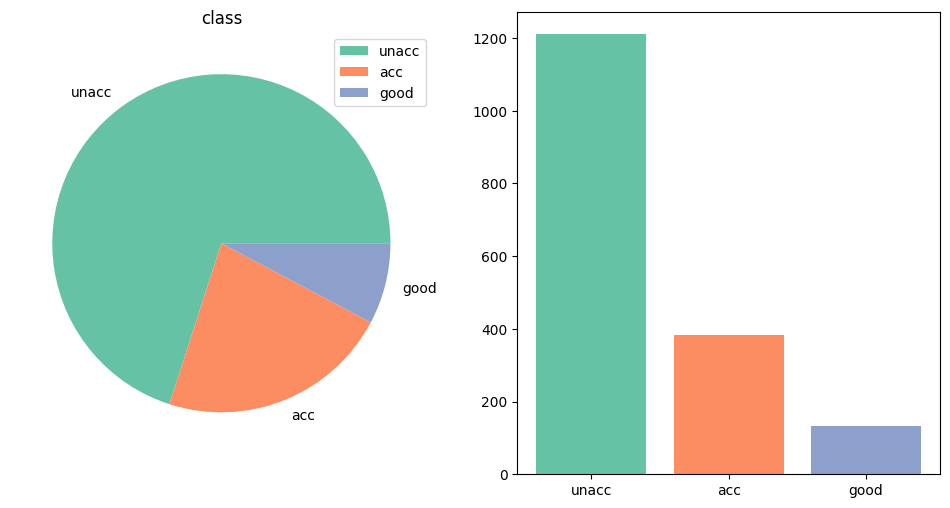

In [84]:
df_2 = df.copy()
df_2.loc[df["class"] == "vgood", "class"] = "good"

columns = df_2[["class"]].columns
for column in columns :
    
    fig , axes = plt.subplots(1,2,figsize = (12 , 6))
    
    values = df_2[column].value_counts()
    categories = df_2[column].value_counts().index
    colors = palete[:len(categories)]
    
    axes[0].pie(values , labels = categories,  colors = colors)
    axes[0].set_title(column)
    axes[0].legend(categories , loc ="upper right")
    axes[1].bar( categories , values , color = colors)
    
    plt.show()

##### if the good and v good are jointed then the column good is almost 1/3 of the label data

<h1>Eda end</h1>